<a href="https://colab.research.google.com/github/yvrjsharma/Keras-edition-deux/blob/main/Keras_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentals of Machine Learning

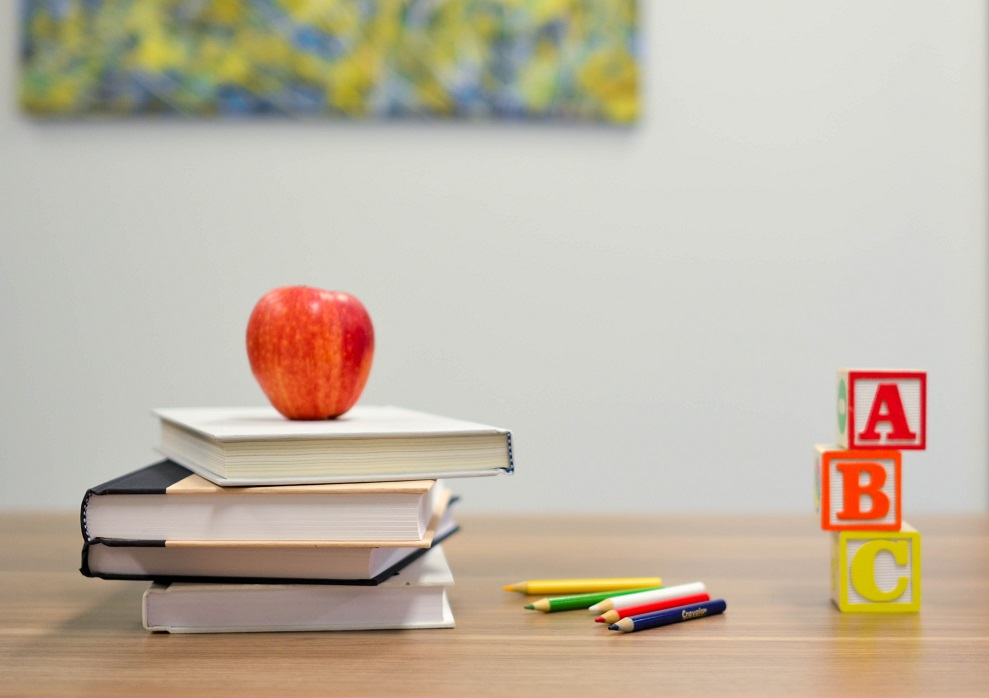

Photo by <a href="https://unsplash.com/@element5digital?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Element5 Digital</a> on <a href="https://unsplash.com/s/photos/building-blocks?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

Below notes cover :

* Whether you should generalize or optimize in ML

* How to evaluate a ML model

* Improving model fitting

* Better generalisation

## Generalization

*Optimization* refers to the process of adjusting a model to get the best performance possible on the training data. *Generalization* refers to the model's abilities to perform well on the yet unseen data.

Overfitting is like a *central problem* in ML, while Generalization is like the *goal* of ML. A model overfits when its performance on never-before-seen data starts diverging from performance on the training data, which continues to improve as training goes on.

  * When a model overfits, it actually learns patterns that are specific to the training data.

  * A more robust model fit would ignore individual data points and look at the bigger picture at ambiguous class boundaries in training data.

  * Overfitting can happen when
    * The train data is noisy -- when the independent features or images or texts are mislabeled.
    * Training data can also involve rare features or uncertainty -- for example MNIST dataset has images of some of the letters or special characters along with digits. Another example of rarity in training data would be having unique or very less frequently used words in some of the IMDB movie reviews. That is the reason why we picked only 10000 most used words in the last blog post / chapter.  
    * Training data is well labeled but has outliers.
    * There is randomness or ambiguity in the input space, for example same atmospheric conditions might or might not cause rains.  

Lets try adding noise to our MNIST dataset and inspect the model behavior -

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

#Getting data, converting ints to floats and normalizing
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255 

#Adding noiose
train_images_with_noise_channels = np.concatenate([train_images, np.random.random((len(train_images), 784))], axis=1)

#Adding zeros
train_images_with_zero_channels = np.concatenate([train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#training model from second chapter on this modified data
from tensorflow import keras
from tensorflow.keras import layers
def get_model():
  model = keras.Sequential([layers.Dense(512, "relu"),
                            layers.Dense(10,"softmax")])
  model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  return model

model = get_model()
history_noise = model.fit(train_images_with_noise_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2)

model = get_model()
history_zeros = model.fit(train_images_with_zero_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2)

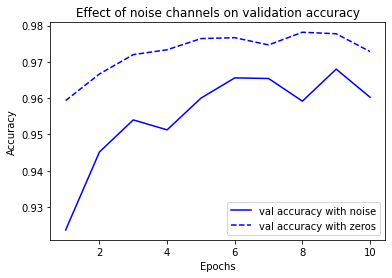

In [ ]:
#Ploting val accuracies for two noise channels
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]

epochs = range(1,11)

plt.plot(epochs, val_acc_noise, "b-", label="val accuracy with noise")
plt.plot(epochs, val_acc_zeros, "b--", label="val accuracy with zeros")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

By looking at the above graph we can tell that the data with Noise features has the accuracy which is one point lower. Noise features eventually lead to overfitting. Sometimes, it is important to reduce features and thus noise in your data by doing a *feature selection* before building your model. For example, we did this by selecting only 10000 most frequent words in the previous posts (IMDB movie review).

A very interesting observation would be that a *Deep Learning model* would learn to map any random input data with randomly generated input labels given enough epochs. The results on the validation group for such data will be totally off, as would make sense too. Thus, the nature of generalization of a DL model has much to do with the structure of information presented to them, than with the model/architectures themselves.


**The Manifold Hypothesis**

Francois explains this intuitive concept of manifold. Consider a space represented by all pixels values possible for 28*28 pixels with each pixel's value varying between 0 to 255. Now, intuitively the MNIST samples would occupy a very small subspace off this parent space. He further posits that this tiny subspace is highly structured, *continuus* meaning you can modify a sample digit a little and it will still be recognizable as the same digit, and lastly all samples in this subspace are connected meaning you can morph one digit image into another using some intermediate transformations.

This subspace can be called a *manifold* or a closed space. A manifold is defined by the author as a lower-dimensional subspace of some parent space that is locally similar to a linear space. Further, **manifold hypothesis posits that all natural data lies on a low-dimensional manifold within the high-dimensional space where it is encoded**. This is the basis of why deep learning works at all. MNIST digits, human faces, human voice, natural language text all can be represented like this.
* Manifold hypothesis implies ML models only have to fit to a low-dimensional subspace which is highly structured and lies inside a much bigger input space.
* Within a manifold, you can interpolate or morph one input to another via a *continuous* path as stated before in case of mnist. This interpolation capability is crucial to understand the **generalization** in Deep learning.

**Interpolation**

The points that your model has never seen before (when it tries to **genaralize**) can be related to other nearby available points on the latent manifold space, since data points in your manifold can interpolate. Paraphrasing the author's words - you can make sense of the totality of the space using only the sample of space available to you while training, you can use interpolation to fill in the blanks.

However, interpolation can only help you make sense of things that are very close to what the model has seen before, it enables **local generalization**.

**What is a Deep earning model?**
**A Deep Learning model is what you put into it: The Architecture priors and the Data it was trained on.**

* A Deep Learning model is basically a very high dimensional curve, that is smooth and continuous since it needs to be differentiable. This curve is fitted to data points via gradient descent, smoothly and incrementally. The smoothness of the curve helps approximate the latent manifold from one point to another.
* A Deep Learning model, via its architecture priors (think LSTMs, CNNS, transformers *etc*), is structured in a way that mirrors the shape of the information in its training data.
*Lastly, a Deep Neural Network structures its learned representations in an hierarchical and modular way, for example CNN layers learning lines, curves, and then shapes, and then eyes, nose, face and then whole image.

All this discussion makes it all the more clear that the more informative and less noisy your features are, the better you will be able to generalize since your input space will be simpler and more structured. Data Curation and feature engineering are essential to better generalization.

**Regularizing Deep Learning Models**

When you can't get more data to train your model on to improve its generalization abilities, you can work on modulating the quantity of information that the model is allowed to store, meaning you can add constraints on the smoothness of your model curve. You can force your model this way to learn the most prominent patterns in the data which have a higher chance of generalizing well. This process of avoiding *Overfitting* is called *Regularization* 

## Evaluation 

How to evaluate your models. It is essential to be able to reliably measure the generalization power of your model.

**Validation Sets**
* You develop a model by tuning its configuration - example, number of layers, units in layers and so on. These are called *Hyperparameters* of the model.
* This tuning is done based on the performance on the validation set, and can quickly turn into overfitting on the validation set as well.
* When you tune your model as per validation set, some **information leaks** from your "unseen" validation data into your model. Because of this at the end of the training you have a model which performs artificially well on the Validation set because you have optimized it to do so.

**Test sets**
* You care about a model's performance on totally unseen data thus you need never before seen data to evaluate the model, this is called the Test dataset.

### Validation techniques

**Simple Holdout Validation**

Break your data into Train and Test sets. Tune your data on the validation set, while training on the train set. Validation set is created by breaking the train set into two parts(example, 20% train data as val data).
* Flaw : If only little data is available for training we are compromising with the model of effective learning.
* If different random shuffling rounds of your train data before splitting end up yielding very different measures of model performance, then you can say the data size is too small and you should change this validation approach.

**K-Fold Validation**

* Above problem of small data can be addressed using this approach.
* You split your data into K-folds of equal sizes and for each partition train your model on remaining (K-1) partitions and use this one as validation set to evaluate. FInal evaluation score is the average of the K scores you thus obtain at the end of the exercise.

**Iterated K-Fold Validation with Shuffling**

* Also implied in situations when you have very little train data available.
* You shuffle your data and apply K-Fold validation on this data before shuffling it again and applying K-Fold again. This process is repeated P times, and at the end your validation score is the average of all scores and you have trained P*K number of times, which can be very expensive and time consuming.

**Key points to keep in mind while doing train-validation splits**

* Data should be representative of the same population in both train and val sets.
* If there is time based data being used, make sure your *shuffling* before splitting doesn't give future data points in the train set. This would lead to something called *temporal leak*
* There should be no redundancy of data points, meaning the same data should not feature in train and validation sets. Make sure they are disjoint sets. 


*Keep in mind that there is always a tension between these facets of machine learning while building your best models - between optimization and generalization, and between underfitting and overfitting.*

## Improve Your Model Fit

* First overfit your model, and then generalize.
* When you start training three things might happen -
  1. **Training loss doesn't decrease** meaning your training is not even getting started or it is stuck. This is something that can always be resolved. Just remember we can even fit our model to a random training data.
    * It can be due to the choice of **Optimizer**, or
    * Distribution of **intial weights**, or
    * **Learning rate** is one of the most likely causes. Too high lr will make gradient updates overshoot while too small lr would make improvement so slow that training might appear to stall, or
    * **Batch size**
  2. Training starts, but you can't generalize it.
  3. Training happens, both train and validation loss go down, but no overfitting happens over time. This would indicate you are still underfitting on the data.


Lets' observe the impact of Learning Rate on model training using MNIST as example -

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

#getting train data, reshaping, normalizing
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255

#Defining model
model = keras.Sequential([layers.Dense(512, "relu"),
         layers.Dense(10, "softmax")])

#Define loss, optimizer(learning rate as 1.0), metrics
#Very high learning rate
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.RMSprop(1.),
              metrics=['accuracy'])

#Fitting over train data with Val split of 20%
model.fit(train_images, train_labels, epochs=15, batch_size=128, validation_split=0.2)


* The model is stuck at the accuracy of around 25% with this high value of learning rate.
* When we lower the value of **lr** to 1e-2, which is more realistic, and observe the results, we find that within 4 epochs the training accuracy has reached ~98%.
* A higher batch size will give gradients which are more informative and less noisy (low variance).

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

#getting train data, reshaping, normalizing
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255

#Defining model
model = keras.Sequential([layers.Dense(512, "relu"),
         layers.Dense(10, "softmax")])

#Define loss, optimizer(learning rate as 1e-2), metrics
#Very high learning rate
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.RMSprop(1e-2),
              metrics=['accuracy'])

#Fitting over train data with Val split of 20%
model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
375/375 [==============================] - 2s 4ms/step - loss: 0.3670 - accuracy: 0.9128 - val_loss: 0.1586 - val_accuracy: 0.9594
Epoch 2/5
375/375 [==============================] - 1s 4ms/step - loss: 0.1458 - accuracy: 0.9627 - val_loss: 0.2003 - val_accuracy: 0.9582
Epoch 3/5
375/375 [==============================] - 1s 4ms/step - loss: 0.1122 - accuracy: 0.9726 - val_loss: 0.1895 - val_accuracy: 0.9678
Epoch 4/5
375/375 [==============================] - 1s 4ms/step - loss: 0.1029 - accuracy: 0.9778 - val_loss: 0.1687 - val_accuracy: 0.9708
Epoch 5/5
375/375 [==============================] - 1s 4ms/step - loss: 0.0926 - accuracy: 0.9812 - val_loss: 0.1930 - val_accuracy: 0.9697


For the second case, when **Training starts, but you can't generalize it** or the validation loss isn't decreasing for some reason, it can be that something is fundamentally wrong with your approach like your input data doesn't have enough information to predict the targets, or the model architecture that you are using is not suited for the problem at hand (for example recurrent networks can deal better with word sequence input type a fully connected network).

Lastly, when your **model loss for training and validation set is still going down** but very slowly, you need to *make your model to overfit*.
* When the model does not overfit, it happens because the model lacks the *representational power* - meaning you need a bigger model.
* Model can be made bigger in terms of adding more layers, or by using bigger layers with higher number of units in them, or using different architecture priors altogether.

Training a bigger model on MNIST - you can see that the model validation loss first decreases and then increases after 8th epoch. That's when overfitting started to happen.

In [ ]:
#model with two hidden layers this time
model = keras.Sequential([layers.Dense(96, "relu"),
                         layers.Dense(96, "relu"),
                         layers.Dense(10, "softmax")])

model.compile(loss="sparse_categorical_crossentropy",optimizer="rmsprop", metrics=["accuracy"])

history_larger_model = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

Text(0, 0.5, 'Val loss')

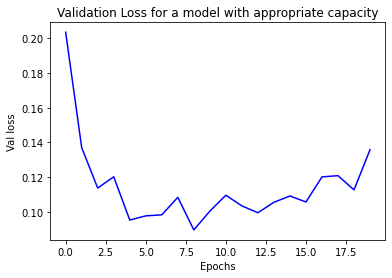

In [14]:
import matplotlib.pyplot as plt

epochs = range(0,20)
plt.plot(epochs, history_larger_model.history['val_loss'], "b-")
plt.title("Validation Loss for a model with appropriate capacity")
plt.xlabel("Epochs")
plt.ylabel("Val loss")

## Improving Model Generalization

What should we do once the model successfully starts to overfit? We maximize model generalization after this.

**Dataset matters**

We have already established that input data can be imagined as a latent manifold subspace and that it has interpolation capabilities. If this space is continuous, the data makes it possible to smoothly interpolate between samples and thus the model trained will be able to generalize very well.

However if the data is noisy, a deep learning approach of curve fitting will not be able to help. This makes it necessary to confirm that your input data is appropriate. Better data gives you better models.
  * More data will give dense sampling of input-cross-output space, and thus better model.
  * Cleaner data with correct labels and zero missing values also helps.
  * Feature selection can help in reducing noise as well.

**Feature Engineering helps**

* Applying hardcoded transformations to data based on your understanding of data and problem, before feeding it into the model to train.
* This approach can help in getting good features to start with. This in turn can help the model train with a lesser amount of data.

**Early Stopping can give best models**

* We need to interrupt model training long before the minimum training loss occurs otherwise the model won't generalize well.
* While doing training, standard practice is to save your model weights after each epoch. Once we identify the epoch after which the validation loss goes on increasing, we use the last saved model for inference.
* **Earlystopping Callback** in Keras helps in interrupting the model training as soon as validation metrics stops improving, and saves the last best model state.

**Regularization of models**

* Regularization techniques help in preventing model's overfitting to the training data, thereby making it more generalizable.
* Regularizing a model is always guided by a specific evaluation procedure/metrics.
1. **Reducing network size**:
  * Simplest way of regularizing is to reduce network size.
  * Reduce the number of parameters
  * Idea is that if the model has limited memorization resources, it will have to resort to learning compressed representations of data.
  * No formula for finding the right number of layers and units within the layers.  General workflow - Start with a few layers and units  and increase the size of layers and their number until you see diminishing returns for validation loss or any other validation metrics.

  Lets look at an example of regularization using the IMDB dataset and classification problem -
  * Below plots demonstrate that the larger model overfit just after 1 epoch.
  * The overfitting for larger moel is much more severe
  * The higher capacity a model has, quicker it can model the training data

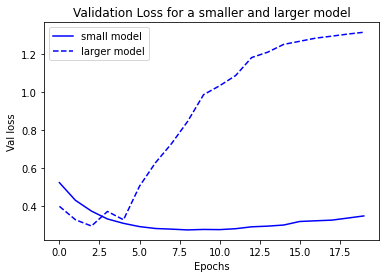

In [27]:
#Lets start with a small model first
from tensorflow.keras.datasets import imdb
import numpy as np
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

#vectorizing available data like before
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results
train_data = vectorize_sequences(train_data)

#small model
model = keras.Sequential([layers.Dense(4, "relu"),
                      layers.Dense(4,"relu"),
                      layers.Dense(1, "sigmoid")])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_original = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4, verbose=0)

#Larger model
model = keras.Sequential([layers.Dense(512, "relu"),
                      layers.Dense(512,"relu"),
                      layers.Dense(1, "sigmoid")])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_larger = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4, verbose=0)


#plotting
epochs = range(0,20)
plt.plot(epochs, history_original.history['val_loss'], "b-", label="small model")
plt.plot(epochs, history_larger.history['val_loss'], "b--", label='larger model')
plt.title("Validation Loss for a smaller and larger model")
plt.xlabel("Epochs")
plt.ylabel("Val loss")
plt.legend()

  2. **Weight Regularization**
    * This is another method of avoiding overfitting.  The idea is that *simpler models* are less likely to overfit than the complex counterparts built on the same data and network architecture.
    * It is done by forcing the model weights to take only small values, this makes the weight distribution across the network more regular.
    * Implemented by adding to the loss function a **cost associated with having too large weights.** It can be done in two ways:
      1. *L1 Regularization*: Cost added to loss function is proportional to absolute values of the model weights
      2. *L2 Regularization*: Cost added is proportional to the square of the weight values. Also called *Weight Decay*.

    * Lets look at an example of Weight Decay - Weight regularizers are passed to layers instances as keyword arguments.

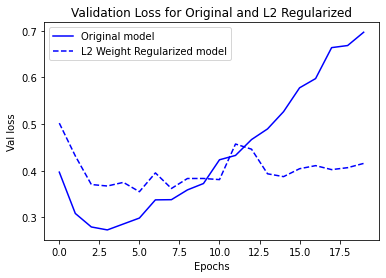

In [4]:
#IMDB movie classification
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

(train_data, train_labels), _ = imdb.load_data(num_words=10000)

#vectorizing available data like before
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results
train_data = vectorize_sequences(train_data)

#weight regularized
model = keras.Sequential([layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation= "relu"),
                          layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation= "relu"),
                          layers.Dense(1, activation= "sigmoid")])
model.compile(loss="binary_crossentropy" , optimizer= "rmsprop" , metrics=["accuracy"])
history_l2_reg = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4, verbose=0)
#Original model
model = keras.Sequential([layers.Dense(16,  "relu"),
                          layers.Dense(16,  "relu"),
                          layers.Dense(1, "sigmoid")])
model.compile(loss="binary_crossentropy" , optimizer= "rmsprop" , metrics=["accuracy"])
history_original = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4, verbose=0)

#plots
epochs = range(0,20)
plt.plot(epochs, history_original.history['val_loss'], "b-", label="Original model")
plt.plot(epochs, history_l2_reg.history['val_loss'], "b--", label='L2 Weight Regularized model')
plt.title("Validation Loss for Original and L2 Regularized")
plt.xlabel("Epochs")
plt.ylabel("Val loss")
plt.legend()

* l2(0.002) in above code means that **every** coefficient in the weight matrix of *that* layer **will add** 0.002*weight_coefficient_value**2 to the total loss of the model
* The model with L2 regularization became much resistant to overfitting than the baseline model, even though both have same number of parameters.

**Note that L2/L1 weight parameterization only makes sense in small networks. Large networks are already over parameterized thus constraints on weight values don't create much impact on model capacity and generalization**

3. **Dropouts**
* Large networks can be regularized using dropout technique.
* Consists of randomly dropping out weights or setting up weights randomly as zero.
* We randomly remove a different subset of neurons for each example in the training set.
* *Dropout rate* is the fraction of features that are zeroed out in a layer.
* Important to note, at Test/Inference time no units are dropped out, instead layers output values are scaled down by a factor equal to dropout rate.

Lets look at an example of Dropout in Keras -

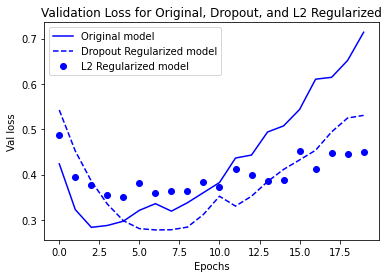

In [6]:
#dropout using
model = keras.Sequential([layers.Dense(16, "relu"),
                          layers.Dropout(0.5),
                          layers.Dense(16, "relu"),
                          layers.Dropout(0.5),
                          layers.Dense(1, "sigmoid")])
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
history_dropout = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4, verbose=0)

#Original model
model = keras.Sequential([layers.Dense(16,  "relu"),
                          layers.Dense(16,  "relu"),
                          layers.Dense(1, "sigmoid")])
model.compile(loss="binary_crossentropy" , optimizer= "rmsprop" , metrics=["accuracy"])
history_original = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4, verbose=0)

#weight regularized
model = keras.Sequential([layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation= "relu"),
                          layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation= "relu"),
                          layers.Dense(1, activation= "sigmoid")])
model.compile(loss="binary_crossentropy" , optimizer= "rmsprop" , metrics=["accuracy"])
history_l2_reg = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4, verbose=0)

#plots
epochs = range(0,20)
plt.plot(epochs, history_original.history['val_loss'], "b-", label="Original model")
plt.plot(epochs, history_dropout.history['val_loss'], "b--", label='Dropout Regularized model')
plt.plot(epochs, history_l2_reg.history['val_loss'], "bo", label='L2 Regularized model')
plt.title("Validation Loss for Original, Dropout, and L2 Regularized")
plt.xlabel("Epochs")
plt.ylabel("Val loss")
plt.legend()

Clearly, the best performing model is the Dropout model, as it has the lowest validation loss reached.

To conclude the discussion from this chapter, the most common ways to maximize generalization and prevent overfitting in deep learning models -
* Get more training data.
* Get better, labeled, and cleaned training data.
* Reduce model capacity.
* Add weight regularization (for small models).
* Add dropout regularization (for large networks).